# Probabilidad y Estadística para IA. Práctico Clase 3 (WIP)

#### Ejercicio 1

Juan y Pedro juegan un juego de dados en el cual el que tira el dado más alto gana. Si ambos tiran el mismo número, tiran de nuevo hasta
que uno gane. Juan ganó. 

(a) Encontrar la probabilidad de que haya ganado con un 5. (Pista: listar todos los pares de tiradas de Juan y
Pedro en las que Juan gana, y encontrar en cuáles gana con un 5)



R:

La cantidad de resultados posibles de arrojar dos dados de 6 es 36, pero de esos resultados sólo interesan aquellos en los que gana Juan. Si se restan los 6 de empate es simétrica la cantidad de resultados en los que Juan gana o pierde: $ \frac{36-6}{2} = 15 $.
De esos 15 sóló existen cuatro casos posibles en los que gana.

$$
P(X=5|X>Y) = \frac{P(X=5 \cap X>5)}{P(X>Y)} = \frac{4}{15}
$$


(b) Simular un dado y encontrar una estimación de la probabilidad anterior.

In [1]:
n_samples = 1000000;
p = unidrnd(6,[1,n_samples]); % Resultado de tirada de Pedro
j = unidrnd(6,[1,n_samples]); % Resultado de tirada de Juan
jg = sum(j>p); % Número de veces que Juan ganó
prob = sum((j==5) & (p<=4))/jg # % Número de veces que Juan ganó con 5 sobre total de veces que ganó

prob =  0.26636


#### Ejercicio 2

Sea la longitud de una vara L. Supongamos que optamos por cortar la vara en un lugar elegido uniformemente al azar Y . Nos quedamos con la parte de vara de longitud entre [0, Y ]. Luego nuevamente decidimos partir la porción restante en un lugar aleatoriamente elegido uniformemente, y llamamos a la longitud resultante X (Pista: usar la ley de esperanzas iteradas).

(a) Encontrar la expresión de E [X] en función de L.

$$
E[Y] = \frac{L}{2}
$$

$$
E[X]=E[X|Y]=E[E[Y]]=\frac{L}{4}
$$


(b) Encontrar la expresión de var[X ] en función de L.

(c) Simular el proceso con N = 1000 ensayos y encontrar la media y
varianza muestral de X .

In [2]:
n_samples = 1000;
cuts=zeros(n_samples,1);
L = 1000;
for i = 1:n_samples
  cut_y = unidrnd(L);
  cuts(i) = unidrnd(cut_y);
endfor
mean(cuts/L),var(cuts/L)

ans =  0.24055
ans =  0.044488


In [3]:
% Ejercicio 3

% X,Y ~ U[0,1] independientes.

% Z = X + Y
% Queremos calcular la esperanza de E[Z|X]
% Esto es lo mismo que escribir E[X+Y|X]
% Como la esperanza es distributiva podemos escribir E[X|X] + E[Y|X]
% E[Y|X] = 1/2 -> porqué? porque son independientes y es e
% E[X|X] = X

% TODO: ver

Sea un proceso AWGN:

$$
y(n) = 2 + w(n), \text{ donde } w(n) ∼ N(0,1)
$$

Estimar la media y varianza de y (n) usando los siguientes estimadores:

(c)
$$
\bar{y} = \frac{1}{N}\Sigma_{i=0}^{N-1}y(i)
$$

(d)

$$
s_n = \frac{1}{N}\Sigma_{i=0}^{N-1}(y(i)-\bar{y})^2
$$

(e)

$$
s_{n-1} = \frac{1}{N-1}\Sigma_{i=0}^{N-1}(y(i)-\bar{y})^2
$$

(f) Calcular la esperanza de cada estimador

In [4]:
TODO

error: 'TODO' undefined near line 1 column 1


(g) Simular con N = 10 y N = 10000

In [5]:
function samples = awgn(n)
    samples = randn(1,n) + 2;
end

In [6]:
function result = ymean(s)
    n = size(s)(2);
    result = (1/n)*sum(s);
end

function result = sn(s)
    n = size(s)(2);
    mu = ymean(s);
    result = (1/n)*sum((s-mu).^2);
end

function result = sn1(s)
    n = size(s)(2);
    mu = ymean(s);
    result = (1/(n-1))*sum((s-mu).^2);
end



In [7]:
function run_sim(n_samples)
    signal = awgn(n_samples);
    plot(signal);
    ymean(signal),sn(signal),sn1(signal)
end

ans =  1.9488
ans =  1.0589
ans =  1.1766


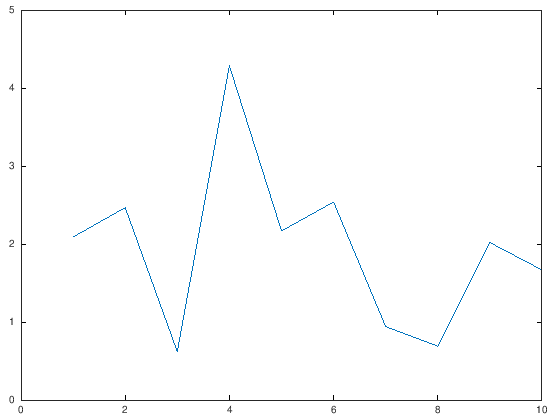

In [8]:
run_sim(10)

ans =  1.9723
ans =  1.0319
ans =  1.0330


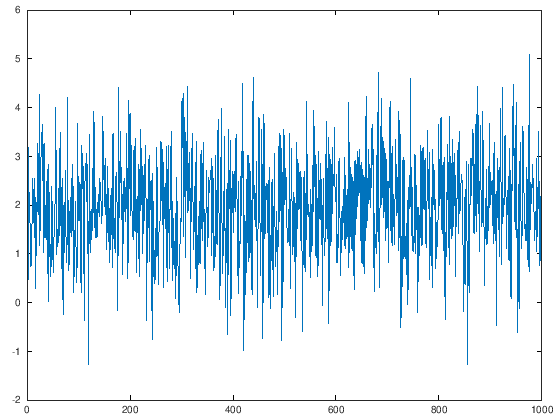

In [9]:
run_sim(1000)

(h) Interpretar los valores de $s_n$ , $s_{n−1}$ en cada caso. ¿Cuál es mejor de los dos?

R: Para números bajos de muestras $S_{n-1}$ es mejor estimador. A medida que aumenta el número de muestras aumenta el impacto de la corrección disminuye y tienden a ser equivalentes.